In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
df = pd.read_csv('data.csv')
df

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,RISING costs have forced packaging producer Hu...,negative
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral
5840,"In the building and home improvement trade , s...",neutral


In [3]:
df['Sentiment'] = df['Sentiment'].replace({'neutral': 0, 'positive': 1,'negative':2})
df['Sentiment']

C:\Users\Mihit\AppData\Local\Temp\ipykernel_21912\4272873415.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sentiment'] = df['Sentiment'].replace({'neutral': 0, 'positive': 1,'negative':2})


0       1
1       2
2       1
3       0
4       0
       ..
5837    2
5838    0
5839    0
5840    0
5841    1
Name: Sentiment, Length: 5842, dtype: int64

In [4]:
df
#  positive = 1, neutral = 0, negative = 2



,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,1
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",2
2,"For the last quarter of 2010 , Componenta 's n...",1
3,According to the Finnish-Russian Chamber of Co...,0
4,The Swedish buyout firm has sold its remaining...,0
...,...,...
5837,RISING costs have forced packaging producer Hu...,2
5838,Nordic Walking was first used as a summer trai...,0
5839,"According shipping company Viking Line , the E...",0
5840,"In the building and home improvement trade , s...",0


In [5]:
df['Sentiment'].value_counts()

Sentiment
0    3130
1    1852
2     860
Name: count, dtype: int64

In [6]:
import re
import nltk
from bs4 import BeautifulSoup
from nltk.corpus import stopwords

In [7]:
df['Sentence'] = df['Sentence'].str.lower()

df['Sentence'] = df['Sentence'].apply(lambda x: re.sub('[^a-z A-Z 0-9]','',x))

df['Sentence'] = df['Sentence'].apply(lambda x: " ".join([y for y in x.split() if y not in stopwords.words('english')]))

df['Sentence'] = df['Sentence'].apply(lambda x: re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', 
                                                         '' , str(x)))

df['Sentence'] = df['Sentence'].apply(lambda x: BeautifulSoup(x,'lxml').get_text())

df['Sentence'] = df['Sentence'].apply(lambda x: " ".join(x.split()))

df

,Sentence,Sentiment
0,geosolutions technology leverage benefon gps s...,1
1,esi lows 150 250 bk real possibility,2
2,last quarter 2010 componenta net sales doubled...,1
3,according finnishrussian chamber commerce majo...,0
4,swedish buyout firm sold remaining 224 percent...,0
...,...,...
5837,rising costs forced packaging producer huhtama...,2
5838,nordic walking first used summer training meth...,0
5839,according shipping company viking line eu deci...,0
5840,building home improvement trade sales decrease...,0


In [8]:
#from nltk.stem import WordNetLemmatizer
#lem = WordNetLemmatizer()

#def lemmetizer(text):
    #return " ".join([lem.lemmatize(word) for word in text.split()])

In [9]:
#df['Sent'] = df['Sentence'].apply(lambda x: lemmetizer(x))

#df['Sent']

In [10]:
from nltk.stem import SnowballStemmer

st = SnowballStemmer(language = 'english')

In [11]:
def stem(text):
    return " ".join([st.stem(word) for word in text.split()])

In [12]:
df['Sent'] = df['Sentence'].apply(lambda x: stem(x))

df['Sent']

0       geosolut technolog leverag benefon gps solut p...
1                         esi low 150 250 bk real possibl
2       last quarter 2010 componenta net sale doubl eu...
3       accord finnishrussian chamber commerc major co...
4       swedish buyout firm sold remain 224 percent st...
                              ...                        
5837    rise cost forc packag produc huhtamaki axe 90 ...
5838    nordic walk first use summer train method cros...
5839    accord ship compani vike line eu decis signifi...
5840    build home improv trade sale decreas 225 eur 2...
5841    helsinki afx kci konecran said order four hot ...
Name: Sent, Length: 5842, dtype: object

In [13]:
df['Sentence']


0       geosolutions technology leverage benefon gps s...
1                    esi lows 150 250 bk real possibility
2       last quarter 2010 componenta net sales doubled...
3       according finnishrussian chamber commerce majo...
4       swedish buyout firm sold remaining 224 percent...
                              ...                        
5837    rising costs forced packaging producer huhtama...
5838    nordic walking first used summer training meth...
5839    according shipping company viking line eu deci...
5840    building home improvement trade sales decrease...
5841    helsinki afx kci konecranes said order four ho...
Name: Sentence, Length: 5842, dtype: object

## Training the dataset

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df['Sent'],df['Sentiment'],test_size = 0.2)

## Bag of words

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer()
x_train_bow = bow.fit_transform(x_train).toarray()
x_test_bow = bow.transform(x_test).toarray()

## Tf-idf

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
x_train_tfidf = tfidf.fit_transform(x_train).toarray()
x_test_tfidf = tfidf.transform(x_test).toarray()

## Multinomial naive bayes

In [17]:
from sklearn.naive_bayes import MultinomialNB

model_bow = MultinomialNB().fit(x_train_bow,y_train)
model_tfidf = MultinomialNB().fit(x_train_tfidf,y_train)

In [18]:
from sklearn.metrics import classification_report,accuracy_score

y_pred_bow=model_bow.predict(x_test_bow)
y_pred_tfidf = model_tfidf.predict(x_test_tfidf)

In [19]:
print('Accuracy using bag of word is',accuracy_score(y_test,y_pred_bow)*100,'%')
print('Accuracy using Tf-idf is',accuracy_score(y_test,y_pred_tfidf)*100,'%')

Accuracy using bag of word is 69.46107784431138 %
Accuracy using Tf-idf is 66.9803250641574 %


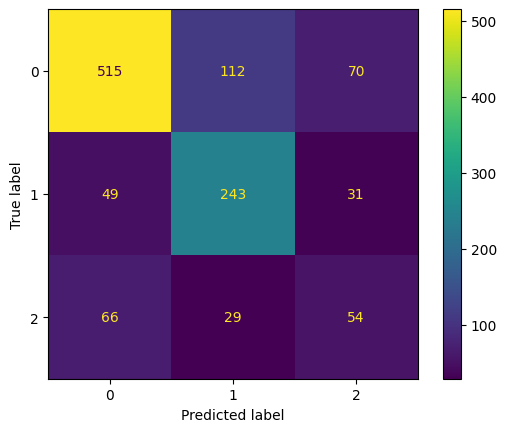

In [20]:
print(metrics.ConfusionMatrixDisplay.from_predictions(y_pred_bow,y_test))

## Randomforest classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier
clas_tfidf = RandomForestClassifier().fit(x_train_tfidf,y_train)
clas_bow = RandomForestClassifier().fit(x_train_bow,y_train)

In [22]:
y_predi_bow = clas_bow.predict(x_test_bow)
y_predi_tfidf = clas_tfidf.predict(x_test_tfidf)

In [23]:
print('Accuracy using bag of word is',accuracy_score(y_test,y_predi_bow)*100,'%')
print('Accuracy using Tf-idf is',accuracy_score(y_test,y_predi_tfidf)*100,'%')

Accuracy using bag of word is 65.35500427715996 %
Accuracy using Tf-idf is 66.38152266894782 %


## Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
reg_bow = LogisticRegression().fit(x_train_bow,y_train)
reg_tfidf = LogisticRegression().fit(x_train_tfidf,y_train)

In [43]:
y_pred_bow_reg = reg_bow.predict(x_test_bow)
y_pred_tfidf_reg = reg_tfidf.predict(x_test_tfidf)


In [44]:
print('Accuracy using bag of word is',accuracy_score(y_test,y_pred_bow_reg)*100,'%')
print('Accuracy using Tf-idf is',accuracy_score(y_test,y_pred_tfidf_reg)*100,'%')


Accuracy using bag of word is 66.2104362703165 %
Accuracy using Tf-idf is 70.91531223267751 %


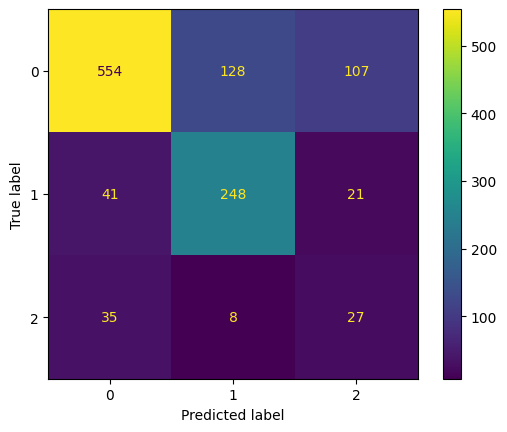

In [45]:
print(metrics.ConfusionMatrixDisplay.from_predictions(y_pred_tfidf_reg,y_test))

## XGboost

In [56]:
from xgboost import XGBClassifier

In [57]:
xg_bow = XGBClassifier().fit(x_train_bow,y_train) 
xg_tfidf = XGBClassifier().fit(x_train_tfidf,y_train)

In [59]:
y_pred_bow_xg = xg_bow.predict(x_test_bow)
y_pred_tfidf_xg = xg_tfidf.predict(x_test_tfidf)

In [60]:
print(accuracy_score(y_test,y_pred_bow_xg))
print(accuracy_score(y_test,y_pred_tfidf_xg))

0.688622754491018
0.6800684345594525


## ADAboost

In [71]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ada_bow = AdaBoostClassifier(n_estimators = 500).fit(x_train_bow,y_train)
#ada_tfidf = AdaBoostClassifier(n_estimators = 100,learning_rate = 1).fit(x_train_tfidf, y_train)

C:\Users\Mihit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [73]:
y_pred_bow_ada = ada_bow.predict(x_test_bow)
#y_pred_tfidf_ada = ada_tfidf.predict(x_test_tfidf)

In [74]:
print(accuracy_score(y_test,y_pred_bow_ada))
#print(accuracy_score(y_test,y_pred_tfidf_ada))

0.6809238665526091


In [ ]:
y_pred_bow_data

## Support vector machine

In [54]:
from sklearn.svm import SVC

In [ ]:
svm_bow = SVC().fit(x_train_bow,y_train)
svm_tfidf = SVC().fit(x_train_tfidf,y_train)

In [32]:
y_pred_bow_svm = svm_bow.predict(x_test_bow)
y_pred_tfidf_svm = svm_tfidf.predict(x_test_tfidf)


In [33]:
print('Accuracy using bag of word is',accuracy_score(y_test,y_pred_bow_svm)*100,'%')
print('Accuracy using Tf-idf is',accuracy_score(y_test,y_pred_tfidf_svm)*100,'%')

Accuracy using bag of word is 65.86826347305389 %
Accuracy using Tf-idf is 64.07185628742515 %


## below code is for reduce length of independent variable to make same length as dataframe

In [304]:
y = df[list(map(lambda x: len(x)>0 ,corpus))]
y=pd.get_dummies(y['Sentiment'])
y=y.iloc[:,0].values


In [ ]:
df1['output'] = y

In [315]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)